In [12]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from pylsl import StreamInlet, resolve_stream
import time
import requests
model = load_model('model3s.keras')
# Initialize LSL connection

# Obtaining EEG data



def butter_bandpass(lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, padlen=25)  # Adjust padlen to be smaller than the default
    return y

# Sample rate and desired cutoff frequencies (in Hz)
fs = 250  # Sample rate
lowcut = 8  # Lower cutoff frequency
highcut = 16  # Higher cutoff frequency

# Ensure data is a numpy array and has sufficient length
#data = np.array([sample for timestamp, sample in valuelist if isinstance(sample, list) and len(sample) > 0])  # Extract samples
#data = data[:, 0]  # Assuming you want to filter the first channel

# Apply bandpass filter

#print(filtered_data)

#Function to compute FFT
def compute_fft(data, fs):
    n = len(data)
    fft_data = np.fft.fft(data) / n
    freqs = np.fft.fftfreq(n, 1 / fs)
    return freqs[:n // 2], np.abs(fft_data)[:n // 2]


def everysecond():
    
    valuelist = []
    #tick = time.time()
    while len(valuelist) < 750:
        sample, timestamps = inlet.pull_sample()
        if timestamps:
            valuelist.append(sample[1])  # Store the sample with its timestamp
    #tock = time.time()
    #elapsed_time = tock - tick
    #print(elapsed_time)
    #print(valuelist)

    data = valuelist
    #print(len(data))
    filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)
   
    freqs_filtered, fft_filtered = compute_fft(data, fs)

    # Update the time variables for the next iteration
  
    lower_bound=np.where(freqs_filtered==8)[0][0]
    higher_bound=np.where(freqs_filtered==16)[0][0]+1
    feature=fft_filtered[lower_bound:higher_bound]#only extract the power info from freq 8-16Hz
    feature_norm=feature/max(feature)
    print(feature_norm)
    
    #print(feature_norm)
    example_list = feature_norm
    #input_data = np.array(example_list).reshape(17, 1)
    #input_data = input_data.reshape((1, , 1))
    input_data = np.array(example_list).reshape(25, 1)
    input_data = input_data.reshape((1, 25, 1))
    prediction=model.predict(input_data)
    print(prediction) 
    print(np.argmax(prediction))
    requests.post('http://your.serverIP.should.be.here/in',json={"value":str(np.argmax(prediction)+1)})
    results.append(np.argmax(prediction))
    print(results)
    #return freqs_filtered, fft_filtered





In [19]:
stream_type = "EEG"
#print("Looking for an", stream_type, "stream...")
streams = resolve_stream("type", stream_type)
#print("Connecting to an", stream_type, "stream...")
inlet = StreamInlet(streams[0])
results = []
while True:
    everysecond()
    
 

[0.76938776 1.         0.47399236 0.21338011 0.63272157 0.11979739
 0.42441034 0.19280893 0.55849327 0.10526408 0.54605997 0.535477
 0.65068822 0.46497903 0.3394504  0.26688288 0.84732907 0.78585201
 0.48439639 0.46563101 0.44897032 0.28713933 0.06424796 0.35646196
 0.36229413]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.01469463 0.00970109 0.97560424]]
2
[2]
[0.7818569  1.         0.30876793 0.3041798  0.77453102 0.41753964
 0.45105295 0.48304629 0.54350757 0.4315765  0.5815472  0.97268514
 0.44649861 0.8452962  0.60050129 0.42852528 0.87268744 0.83382683
 0.28910655 0.3797228  0.1799861  0.11792122 0.3974464  0.46945582
 0.14548471]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.01727108 0.00774751 0.97498137]]
2
[2, 2]
[0.17681959 0.84553701 0.07231665 0.55410725 0.63573725 0.22859324
 0.9986538  0.42618215 0.47590627 0.81822184 0.1924778  0.55548803
 0.46971085 0.03985128 0.4253073  1.         0.27362263 0.77063045
 0.58527844 0.23335776 0.36006842 0.85553866 0.40165741 0.41919436
 0.1906

KeyboardInterrupt: 

In [11]:
# # Initialize LSL connection
# stream_type = "EEG"
# print("Looking for an", stream_type, "stream...")
# streams = resolve_stream("type", stream_type)
# print("Connecting to an", stream_type, "stream...")
# inlet = StreamInlet(streams[0])

# # Obtaining EEG data
# valuelist = []
# tick = time.time()
# while len(valuelist) < 500:
#     sample, timestamps = inlet.pull_sample()
#     if timestamps:
#         valuelist.append(sample[1])  # Store the sample with its timestamp
# tock = time.time()
# elapsed_time = tock - tick
# print(elapsed_time)
# print(valuelist)
# data = valuelist


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, padlen=25)  # Adjust padlen to be smaller than the default
    return y

# Sample rate and desired cutoff frequencies (in Hz)
fs = 250  # Sample rate
lowcut = 8  # Lower cutoff frequency
highcut = 16  # Higher cutoff frequency

# Ensure data is a numpy array and has sufficient length
#data = np.array([sample for timestamp, sample in valuelist if isinstance(sample, list) and len(sample) > 0])  # Extract samples
#data = data[:, 0]  # Assuming you want to filter the first channel

# Apply bandpass filter
filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)
print(filtered_data)
# Extract timestamps
#timestamps = [timestamp for timestamp, sample in valuelist]
'''
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(timestamps[:250], data[:250], 'b-', label='Original Data')
plt.plot(timestamps[:250], filtered_data[:250], 'r-', linewidth=2, label='Filtered Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Bandpass Filter Example')
plt.legend()
plt.grid(True)
plt.show()
'''

[  2.18391909   3.53620772   4.3885269    4.56161043   3.9687318
   2.63028205   0.67312996  -1.68516664  -4.16498533  -6.4619027
  -8.28716642  -9.40554526  -9.66521461  -9.0156236   -7.51116653
  -5.30064471  -2.60461274   0.31557299   3.19210461   5.78328923
   7.89968362   9.4203945   10.29787631  10.55148808  10.25187747
   9.49965031   8.40254343   7.05533661   5.5260344    3.85055519
   2.03651504   0.07497455  -2.04247719  -4.30494411  -6.66576077
  -9.03201777 -11.26275835 -13.17705992 -14.57150795 -15.24491207
 -15.02677867 -13.80526291 -11.55020629  -8.327447    -4.30177725
   0.27246964   5.0724421    9.73697055  13.9022014   17.23816486
  19.48168209  20.4615841   20.113343    18.48172152  15.71169225
  12.02941415   7.71625659   3.07956691  -1.57599321  -5.973151
  -9.88026998 -13.12183667 -15.58116208 -17.19643525 -17.95213252
 -17.8682384  -16.98972639 -15.37831492 -13.10775505 -10.26297496
  -6.94247169  -3.26256991   0.6383097    4.59733637   8.42859681
  11.9291444  

"\n# Plot results\nplt.figure(figsize=(10, 6))\nplt.plot(timestamps[:250], data[:250], 'b-', label='Original Data')\nplt.plot(timestamps[:250], filtered_data[:250], 'r-', linewidth=2, label='Filtered Data')\nplt.xlabel('Time [s]')\nplt.ylabel('Amplitude')\nplt.title('Bandpass Filter Example')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [25]:
len(filtered_data)
    

500

In [18]:
'''
second_low=3
second_up=4
data_filt_sub=filtered_data[round(second_low*250):round(second_up*250)]
'''

'\nsecond_low=3\nsecond_up=4\ndata_filt_sub=filtered_data[round(second_low*250):round(second_up*250)]\n'

In [24]:
#len(data_filt_sub)

NameError: name 'data_filt_sub' is not defined

500
[0.26400942 0.43466777 1.         0.61199602 0.44449342 0.08834228
 0.60848397 0.62368303 0.24209171 0.6847598  0.40977099 0.16697287
 0.21275192 0.21842048 0.13734836 0.1335698  0.05688171]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
[[0.9235544  0.07086817 0.00557735]]
0


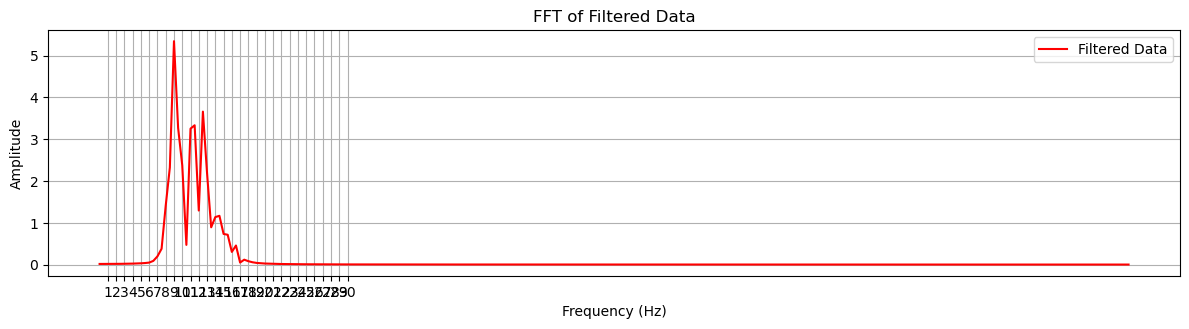

In [31]:
#data=data[2000:2500]

#Function to compute FFT
def compute_fft(data, fs):
    n = len(data)
    fft_data = np.fft.fft(data) / n
    freqs = np.fft.fftfreq(n, 1 / fs)
    return freqs[:n // 2], np.abs(fft_data)[:n // 2]


def everysecond(data, fs):
    print(len(data))
   
    freqs_filtered, fft_filtered = compute_fft(data, fs)

    # Update the time variables for the next iteration
  
    lower_bound=np.where(freqs_filtered==8)[0][0]
    higher_bound=np.where(freqs_filtered==16)[0][0]+1
    feature=fft_filtered[lower_bound:higher_bound] #only extract the power info from freq 8-16Hz
    feature_norm=feature/max(feature)
    print(feature_norm)
    example_list = feature_norm
    input_data = np.array(example_list).reshape(17, 1)
    input_data = input_data.reshape((1, 17, 1))
    prediction=model.predict(input_data)
    print(prediction) 
    print(np.argmax(prediction))   
    return freqs_filtered, fft_filtered

#data_filt_sub=filtered_data[round(second_low*250):round(second_up*250)]

freqs_filtered, fft_filtered = everysecond(filtered_data, fs)


# Compute FFT of original data
#freqs_original, fft_original = compute_fft(data, fs)
'''
# Compute FFT of filtered data
freqs_filtered, fft_filtered = compute_fft(data_filt_sub, fs)
#print(freqs_filtered)
freqs_filtered=freqs_filtered[0:60]
fft_filtered=fft_filtered[0:60]
index_max = np.argmax(fft_filtered)
print(freqs_filtered[index_max])
print(fft_filtered[8:17])
feature=fft_filtered[8:17] #only extract the power info from freq 8-16Hz
feature_norm=feature/max(feature)
print(feature_norm)
'''
# Plot FFT results
plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# plt.plot(freqs_original, fft_original, label='Original Data')
# plt.title('FFT of Original Data')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.grid(True)
# plt.legend()

plt.subplot(2, 1, 1)
plt.plot(freqs_filtered, fft_filtered, color='red', label='Filtered Data')
plt.title('FFT of Filtered Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xticks(range(1,31))
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
freqs_filtered

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59.])

In [36]:
data[0]

-0.16578384

In [13]:
def classify(1s data):
    
    return Hz chosen

SyntaxError: invalid decimal literal (3729972185.py, line 1)